# E-Diagnosis: Unsupervised and Real-time Diagnosis of Small- window Long-tail Latency in Large-scale Microservice Platforms

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import sys
sys.path.append('../')
from tsdr.testseries import sockshop
import math

In [9]:
from scipy.stats import energy_distance
from scipy.stats import permutation_test
from scipy.stats import bootstrap

In [21]:
def e_diagnosis(x: np.ndarray, ind: int, test_method='permutation', alpha=0.05, n_resamples=9999) -> tuple[bool, float]:
    sn, sa = np.split(x, [ind])
    match test_method:
        case 'permutation':
            res = permutation_test(
                (sn, sa), energy_distance, 
                vectorized=False,
                permutation_type='independent',
                alternative='two-sided',
                n_resamples=n_resamples,
                # batch=100,
            )
            return res.pvalue <= alpha, res.pvalue
        case 'bootstrap':
            res = bootstrap(
                (sn, sa), energy_distance, 
                vectorized=False,
                confidence_level=1-alpha*2,
                n_resamples=n_resamples,
                # batch=100,
            )
            return (res.confidence_interval[0] > 0 and res.confidence_interval[1] > 0), res.confidence_interval[0]
        case _:
            raise ValueError(f'Unknown test method: {test_method}')


In [22]:
def diagnose_testcases(bkp: int, alpha: float, n_resamples: int=9999):
    cases = sockshop.testcases_of_sockshop
    ncols = 2
    nrows = math.ceil(len(cases)/ncols)
    fig, axs = plt.subplots(nrows, ncols=ncols)
    fig.set_size_inches(18, 4.0*nrows)
    for case, ax in zip(cases, axs.flatten()):
        ts = np.array(case['datapoints'])
        anomaly, pval = e_diagnosis(ts, bkp, alpha=alpha, n_resamples=n_resamples)
        if anomaly:
            ax.axvline(bkp, color='red', linestyle='dashed', label='breaks')
        print(f"{pval:5f}", case['pattern'], case['name'])
        ax.set_title(case['name'] + '/' + case['pattern'])
        ax.plot(case['datapoints'], color='orange')
        ax.grid()

0.024000 White noise c-orders_network_receive_packets
0.122000 White noise c-orders-db_network_transmit_bytes_total
0.000200 Trend increase c-catalogue_last_seen
0.000600 Noise autocorrection s-front-end_throughput
0.000200 Slight change c-user_memory_usage_bytes
0.000200 Autocorrect s-shipping_throughput
0.000200 Sudden increase c-orders_memory_usage_bytes
0.000200 Level shift up s-front-end_latency
0.000200 Level shift up c-user_memory_working_set_bytes
0.000200 Level shift down c-front-end_memory_usage_bytes
0.000200 Gradual level shift down s-front-end_throughput
0.000200 Single spike s-user_latency
0.000200 Single spike s-orders_latency
0.015400 Single spike c-carts-db_memory_failures_total
0.000200 Noisy single spike c-carts_sockets
0.000200 Noisy multiple spikes s-user_latency
0.000200 Transient level shift up s-front-end_latency
0.000200 Transient level shift up s-orders_latency02
0.000200 Noisy spikes -> Transient level shift down s-orders_latency03
0.000200 Noisy and transien

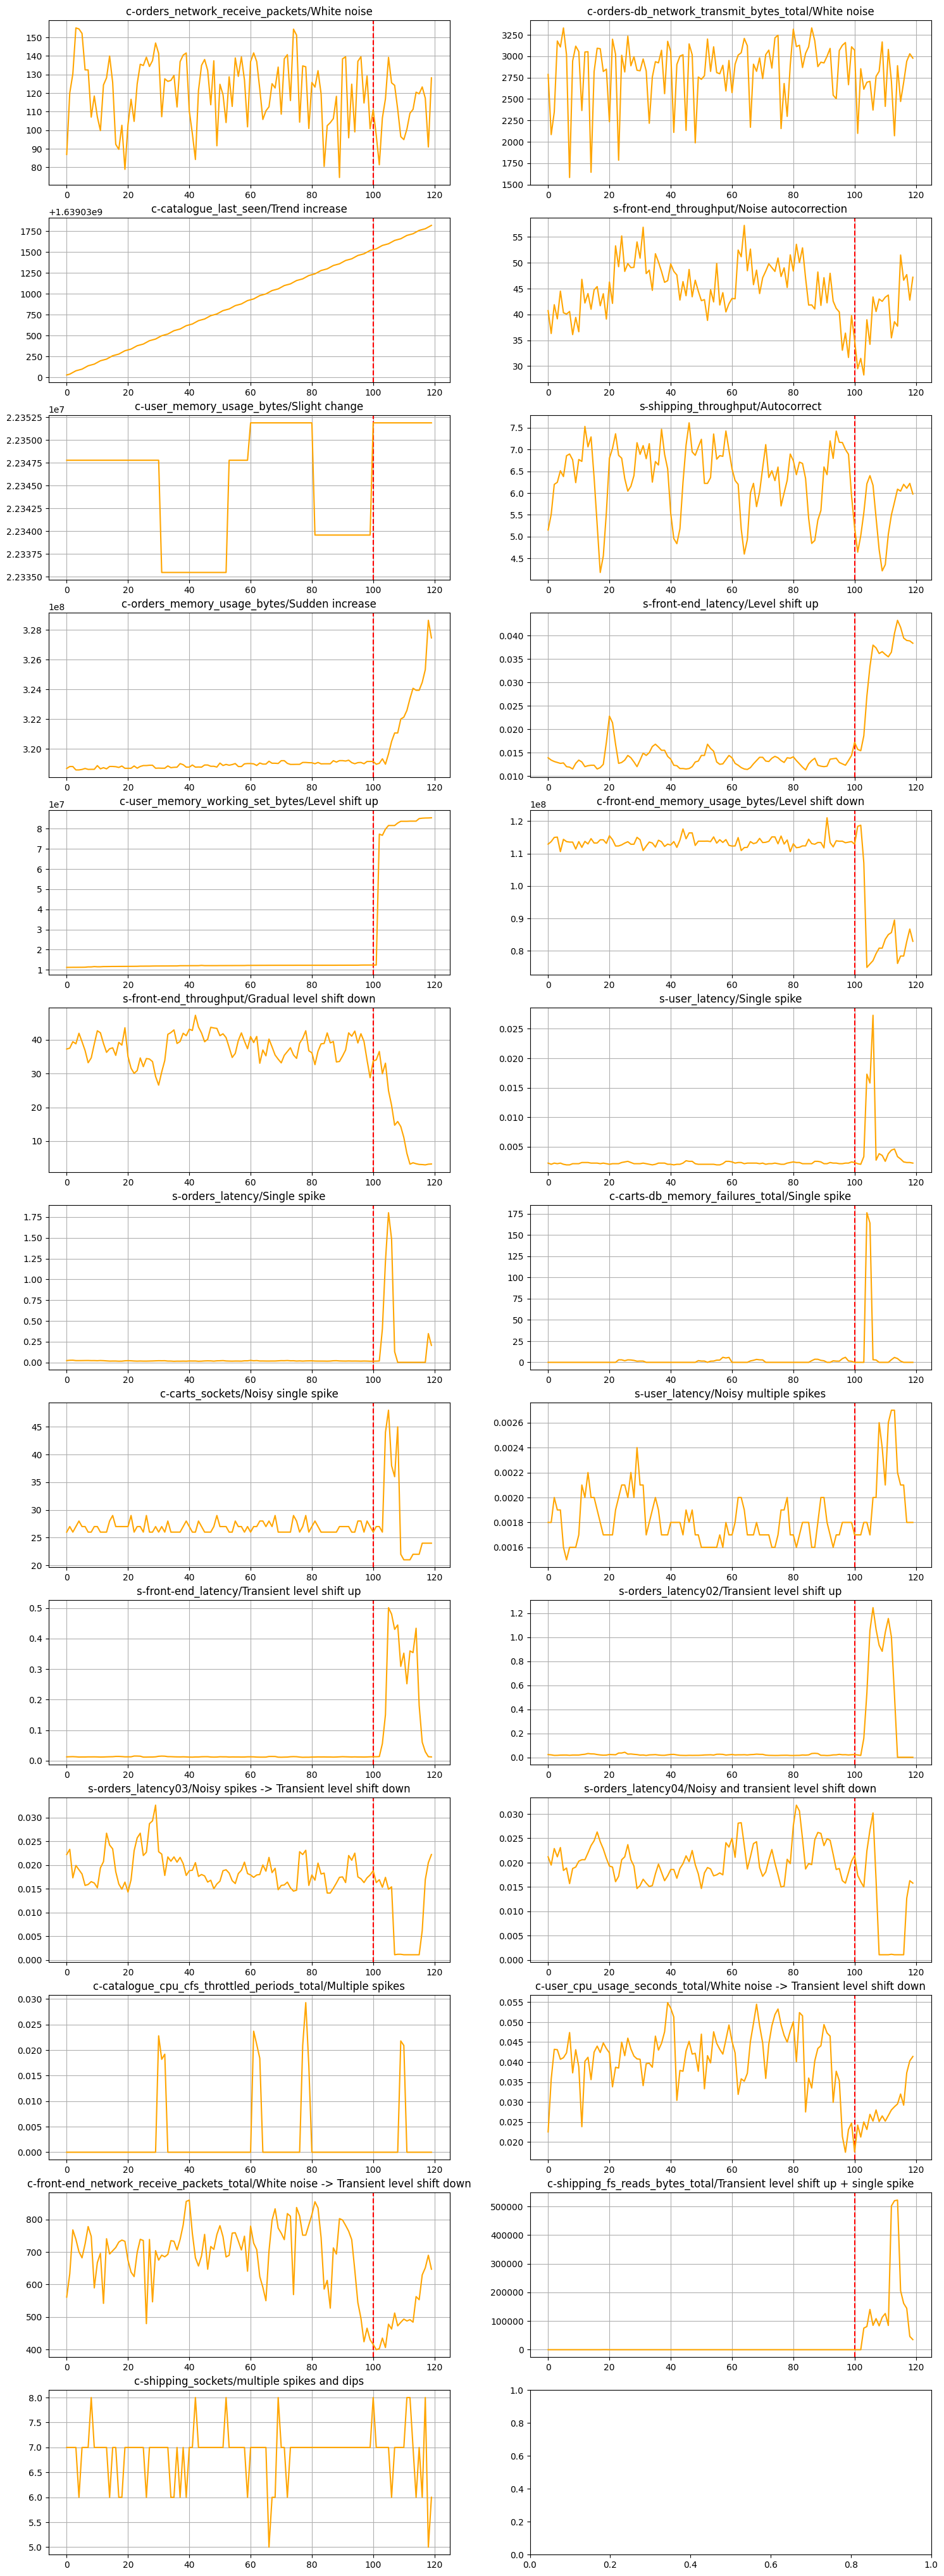

In [23]:
diagnose_testcases(100, 0.05, 9999)

0.028800 White noise c-orders_network_receive_packets
0.126000 White noise c-orders-db_network_transmit_bytes_total
0.000400 Trend increase c-catalogue_last_seen
0.001600 Noise autocorrection s-front-end_throughput
0.000400 Slight change c-user_memory_usage_bytes
0.000400 Autocorrect s-shipping_throughput
0.000400 Sudden increase c-orders_memory_usage_bytes
0.000400 Level shift up s-front-end_latency
0.000400 Level shift up c-user_memory_working_set_bytes
0.000400 Level shift down c-front-end_memory_usage_bytes
0.000400 Gradual level shift down s-front-end_throughput
0.000400 Single spike s-user_latency
0.000400 Single spike s-orders_latency
0.016400 Single spike c-carts-db_memory_failures_total
0.000400 Noisy single spike c-carts_sockets
0.000800 Noisy multiple spikes s-user_latency
0.000400 Transient level shift up s-front-end_latency
0.000400 Transient level shift up s-orders_latency02
0.000400 Noisy spikes -> Transient level shift down s-orders_latency03
0.000400 Noisy and transien

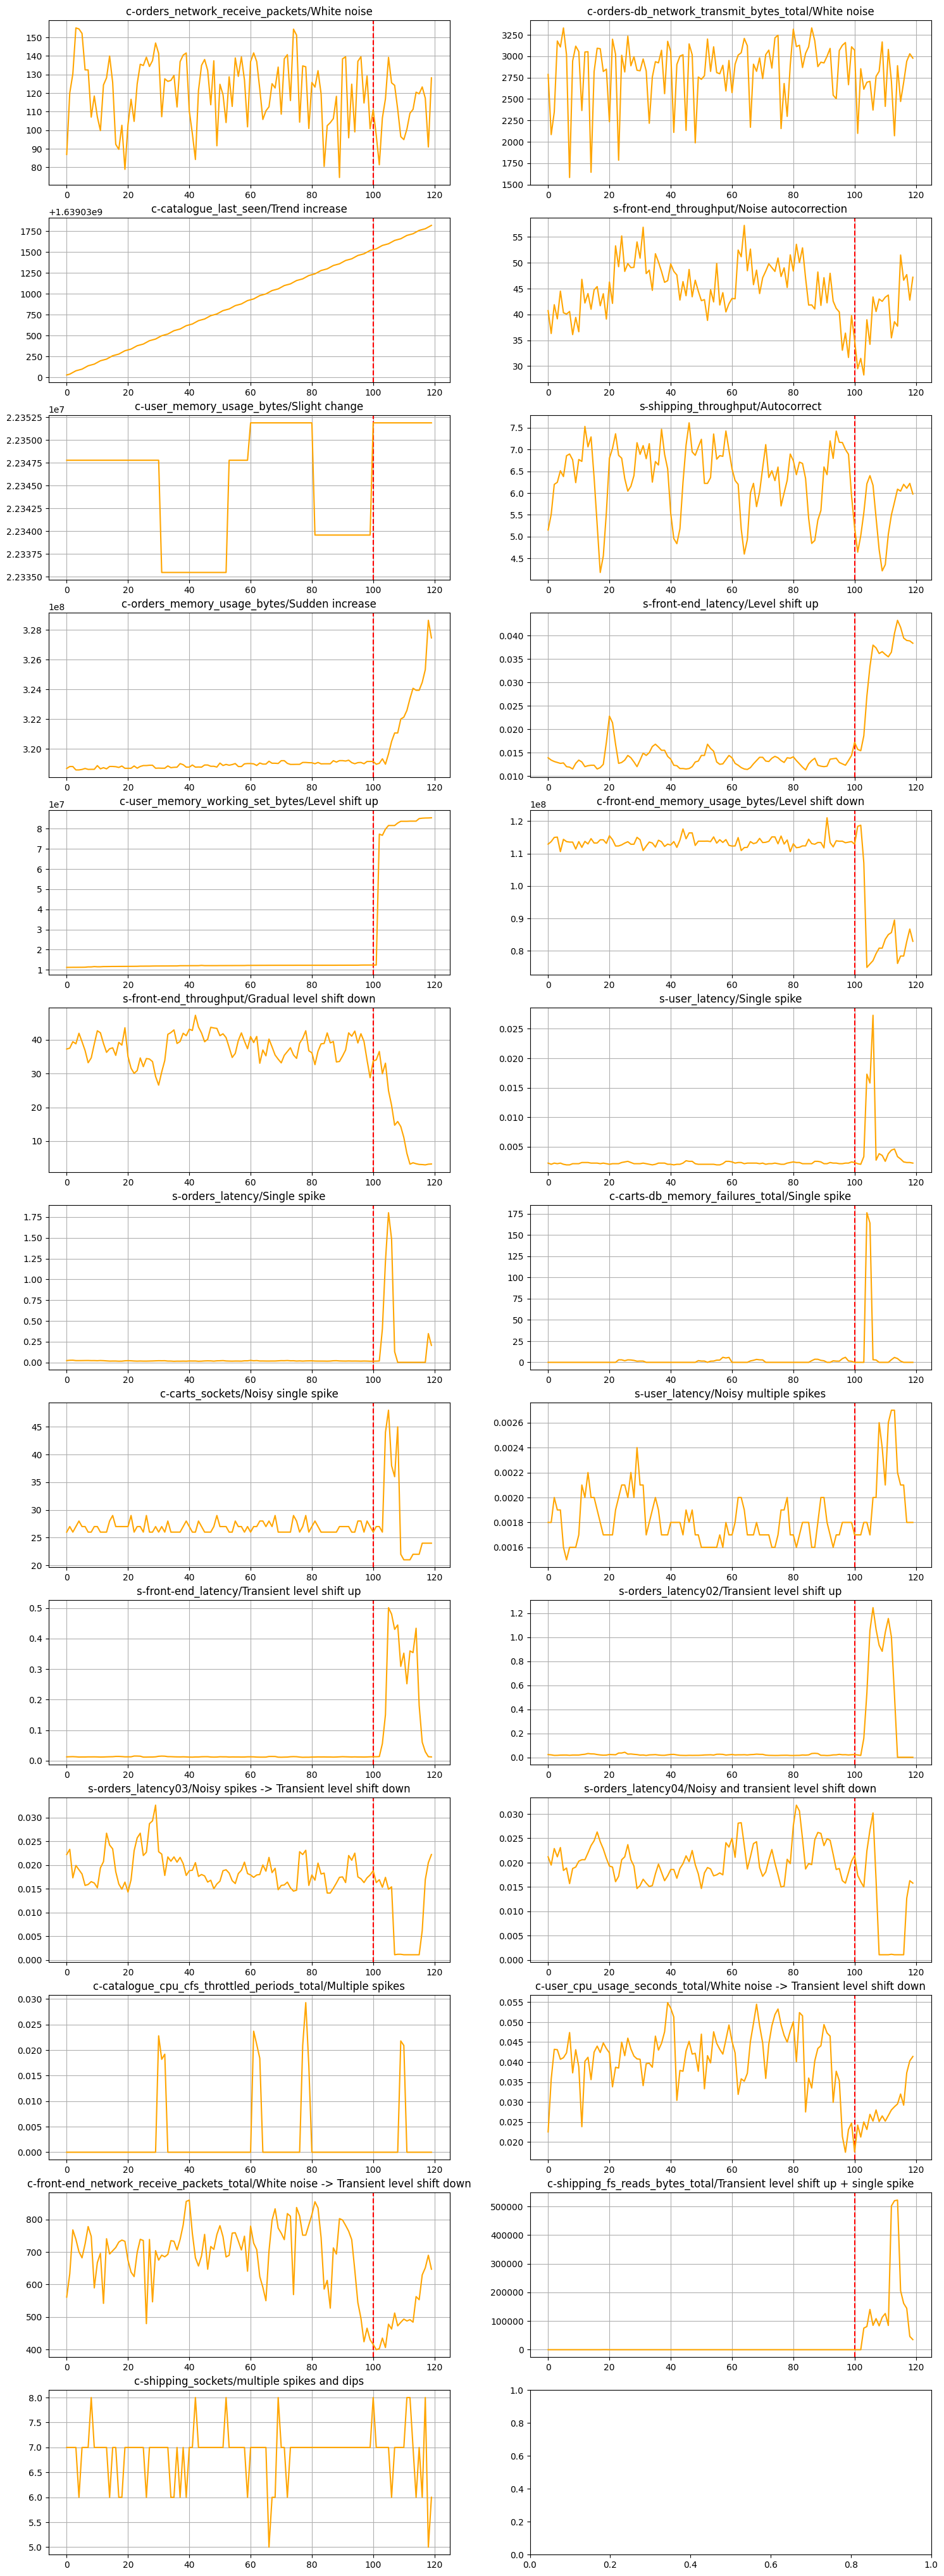

In [24]:
diagnose_testcases(100, 0.05, 4999)

0.019000 White noise c-orders_network_receive_packets
0.137000 White noise c-orders-db_network_transmit_bytes_total
0.001000 Trend increase c-catalogue_last_seen
0.002000 Noise autocorrection s-front-end_throughput
0.001000 Slight change c-user_memory_usage_bytes
0.001000 Autocorrect s-shipping_throughput
0.001000 Sudden increase c-orders_memory_usage_bytes
0.001000 Level shift up s-front-end_latency
0.001000 Level shift up c-user_memory_working_set_bytes
0.001000 Level shift down c-front-end_memory_usage_bytes
0.001000 Gradual level shift down s-front-end_throughput
0.001000 Single spike s-user_latency
0.001000 Single spike s-orders_latency
0.012000 Single spike c-carts-db_memory_failures_total
0.001000 Noisy single spike c-carts_sockets
0.001000 Noisy multiple spikes s-user_latency
0.001000 Transient level shift up s-front-end_latency
0.001000 Transient level shift up s-orders_latency02
0.001000 Noisy spikes -> Transient level shift down s-orders_latency03
0.001000 Noisy and transien

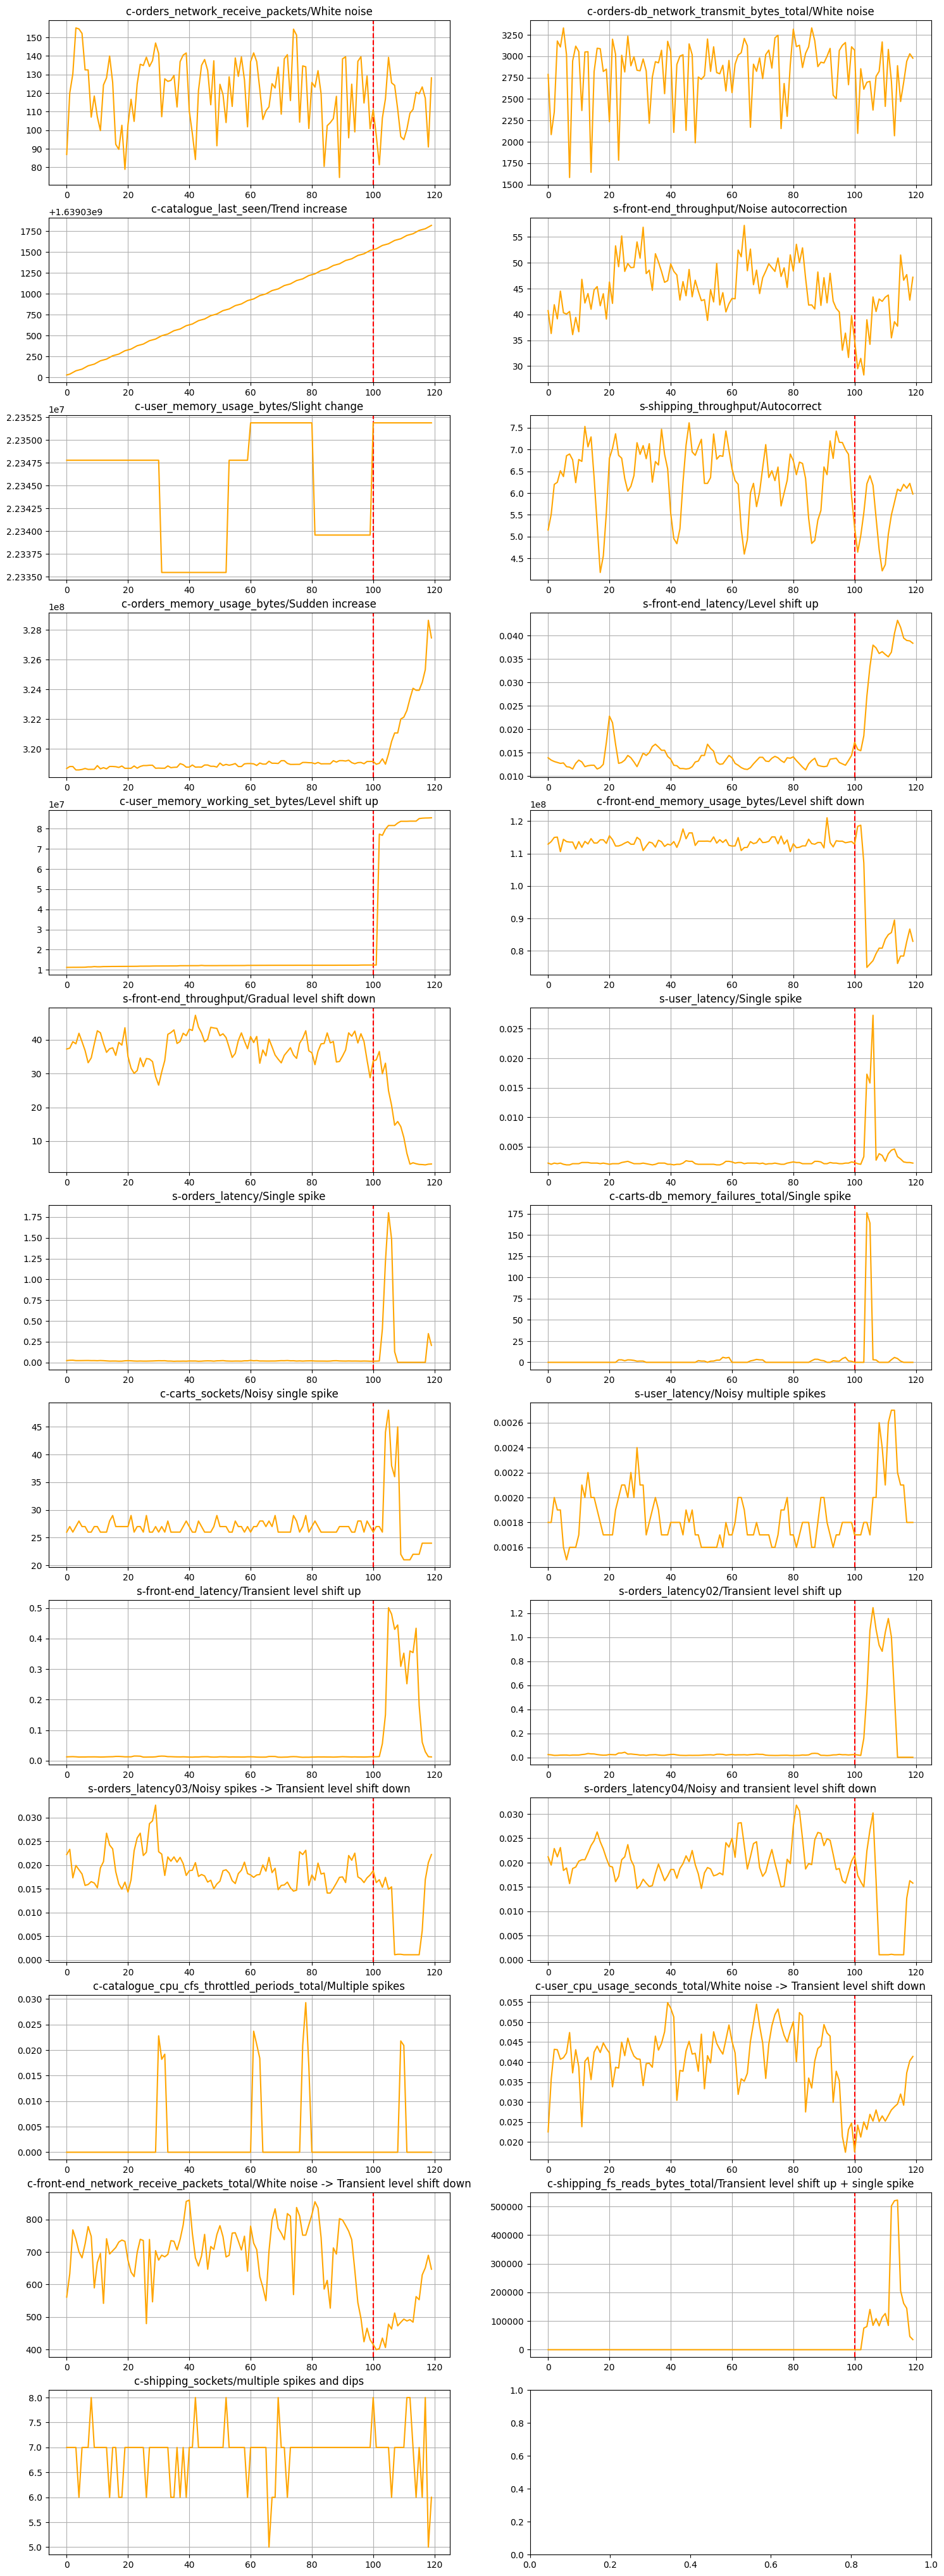

In [25]:
diagnose_testcases(100, 0.05, 1999)

In [ ]:
diagnose_testcases(60, 0.05, 1999)